MNIST Handwritten digit classification using deep learning

Importing the dependencies

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #heat map
import cv2 #computer vision for image recongnization
from google.colab.patches import cv2_imshow #to show images
from PIL import Image #for image processing
import tensorflow as tf
tf.random.set_seed(3) #training the neural network Random state is changed to particular number 
from tensorflow import keras
from keras.datasets import mnist  #data is locded directly
from tensorflow.math import confusion_matrix


Loading the MNIST data from datasets

In [54]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()


In [91]:
#type(X_train) #image is already processed in loaded datafile that's why converted to numpy array

In [56]:
#shape of the numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape) #number od images, height, width

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data==60*10^3

Test data==10*10^3
Image dimension==28*28
Grayscale Image==1 channel

In [57]:
#printing the 10th image
print(X_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [58]:
print(X_train[10].shape)

(28, 28)


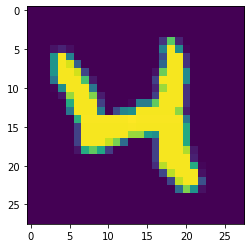

In [59]:
#displaying the image
plt.imshow(X_train[20])  #it is in the numoy array and we need to convert it
plt.show()

In [60]:
#printing the corrsponding labels
print(Y_train[20])

4


Image Labels

In [61]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [62]:
#unique valyes in Y_train
print(np.unique(X_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [63]:
#unique valyes in Y_test
print(np.unique(X_test))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

We can use these labels or use Hot encoding 
0==10000
1==01000

In [64]:
#scalng the images ====to make in the range 0f 0 to 1
X_train=X_train/255
X_test=X_test/255

Building the neural network

In [65]:
#seeting the layers of the neural network
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)), #convert the matrix into single dimensional array
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),  #all the layers are connecting to the previous layer 50-no of neurons in dense
                        keras.layers.Dense(10,activation='sigmoid'), # 10 clasees 0,1,2,3,4,5,6,7,8,9
                        ])

In [66]:
#compiling the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [67]:
#training the neural network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0609 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.034

Accuracy on test data

In [68]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1040 - accuracy: 0.9710


In [69]:
print(accuracy)

0.9710000157356262


In [70]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show>

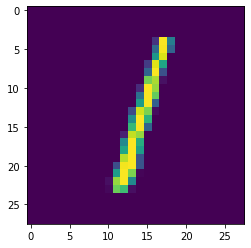

In [71]:
#first data print in X_test
plt.imshow(X_test[2])
plt.show

In [72]:
print(Y_test[2])


1


In [73]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)
print(Y_pred[2])  #probability of each class for that data point

(10000, 10)
[3.2803416e-04 9.9889880e-01 1.9822419e-02 9.1466308e-04 1.8749237e-02
 2.1553025e-01 1.8115714e-01 1.7416507e-02 8.2349467e-01 3.1207800e-03]


In [74]:
# converting the prediction probabilty to class level
label_for_first_image=np.argmax(Y_pred[2])
print(label_for_first_image)

1


In [75]:
# converting the prediction probability to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test==true labels
Y_pred_labels===predicted labels

Confusion metrix

In [76]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 969    1    1    0    1    1    2    2    3    0]
 [   0 1122    1    2    0    4    2    0    4    0]
 [   5    0  999    1    7    1    2    6   11    0]
 [   0    0    5  966    0   23    0    3    7    6]
 [   0    0    2    0  968    1    4    2    1    4]
 [   2    0    0    4    2  878    4    1    1    0]
 [   6    1    0    0    8   11  929    0    3    0]
 [   1    5    9    0    5    0    0  994    8    6]
 [   2    0    3    6    6   10    2    2  943    0]
 [   3    4    0    8   24   10    1    7   10  942]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted labels')

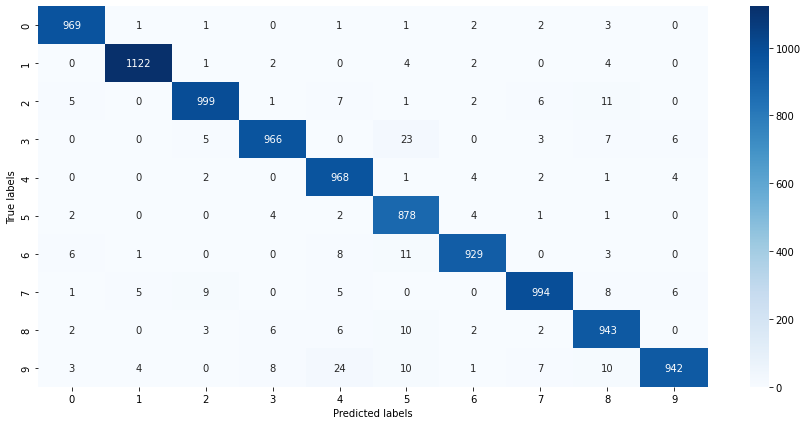

In [77]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')  # fmt=d because all the values are integers
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Building the predictive system


In [83]:
input_image_path='/content/MNIST_digit.png'
input_image= cv2.imread(input_image_path) # image converted into numpy array

print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [79]:
type=(input_image)

In [84]:
#convert the image to grayscale from color
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)


In [85]:
grayscale.shape

(318, 318)

In [86]:
#resizing the image
input_image_resize=cv2.resize(grayscale,(28,28)) #changing the size

input_image_resize.shape
cv2_imshow(input_image_resize)

input_image_resize=input_image_resize/255  #scaling the image between 0 to 1


In [87]:
image_reshaped=np.reshape(input_image_resize,[1,28,28]) #for predicting the value of the 1 image

In [88]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

[[5.9389083e-10 9.4131142e-02 1.9494593e-03 1.0000000e+00 4.7541544e-08
  6.3185507e-01 2.8182675e-13 2.7394295e-04 9.5208365e-01 4.5282638e-01]]
3


Predictive system

path of the image to be predicted/content/MNIST_digit.png


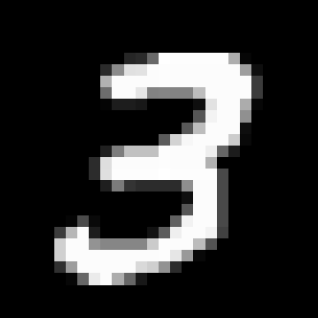

the hand written digit is recognozed as 3


In [89]:
input_image_path= input('path of the image to be predicted')
input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)
print('the hand written digit is recognozed as', input_pred_label)
